In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
# adfuler checks if data is stationary or non-stationary
from statsmodels.tsa.stattools import adfuller

# ARIMA function for model building
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel('Airlines.xlsx',index_col='Month',parse_dates=True)
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [6]:
df.shape

(96, 1)

In [7]:
#drop if any na value is present 
df.dropna(inplace=True)
df.shape

(96, 1)

<AxesSubplot: xlabel='Month'>

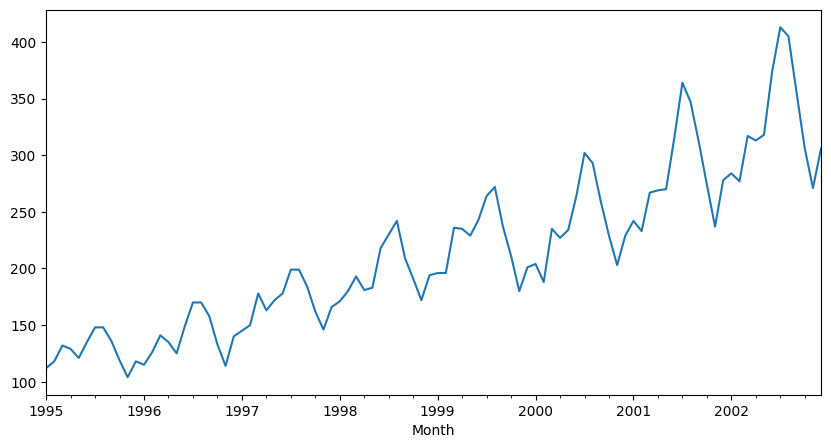

In [8]:
# plot the data
df['Passengers'].plot(figsize=(10,5))

### Check if data is stationary or non-stationary
##### p>0.05 : non-stationary
##### p<0.05 : stationary

In [9]:
def ad_test(dataset):
    dftest = adfuller(dataset,autolag='AIC')
    print("p-value: ",dftest[1])

ad_test(df['Passengers'])
# non stationary 

p-value:  0.9968250481137263


### ETS decomposition (Error,Trend and Seasonality)

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

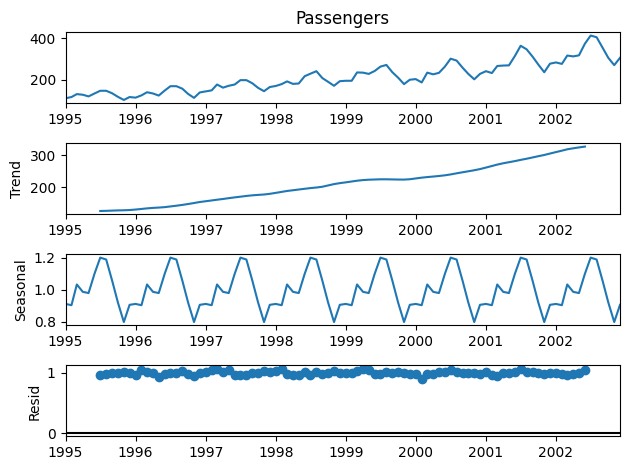

In [11]:
result = seasonal_decompose(df['Passengers'],model='multiplicative')
result.plot();

### ARIMA model for time series forecasting
#### ARIMA (autoregressive integrated moving average model). 
#### ARIMA is specified by 3 order parameters: (p,d,q)
#### AR(p) : autoregression,  I(d) : Integration,  MA(q) : Moving Average
#### Types of ARIMA Model:
#### ARIMA : Non-seasonal Autoregressive Integrated Moving Averages
#### SARIMA : Seasonal ARIMA
#### SARIMAX : Seasonal ARIMA with exogenous variables

In [12]:
# from auto_arima we get odrer of p,d,q
from pmdarima import auto_arima

In [13]:
stepwise_fit = auto_arima(df['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=618.049, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.52 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.50 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.52 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.12 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.24 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.21 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.54 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [14]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Tue, 18 Apr 2023   AIC                            615.965
Time:                                    14:52:35   BIC                            623.222
Sample:                                01-01-1995   HQIC                           618.881
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.97   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split the data

In [15]:
train = df.iloc[:-10]
test = df.iloc[-10:]

In [16]:
print(f"train : {train.shape}")
print(f"test : {test.shape}")

train : (86, 1)
test : (10, 1)


### Create and fit ARIMA model

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
arima_model = SARIMAX(train['Passengers'], 
                order = (1, 1, 0), 
                seasonal_order =(1, 1, 0, 12))
  
arima_model = arima_model.fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   86
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -268.967
Date:                            Tue, 18 Apr 2023   AIC                            543.935
Time:                                    14:53:48   BIC                            550.806
Sample:                                01-01-1995   HQIC                           546.673
                                     - 02-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2408      0.105     -2.291      0.022      -0.447      -0.035
ar.S.L12      -0.2576      0.094     -2.738      0.006      -0.442      -0.073
sigma2        91.7432     15.809      5.803      0.000      60.758     122.729
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.29
Prob(Q):                              0.98   Prob(JB):                         0.32
Heteroskedasticity (H):               2.32   Skew:                             0.42
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prediction of the model against the test data set

In [18]:
start = len(train)
print(start)
end = len(train)+len(test)-1
print(end)

86
95


In [19]:
pred = arima_model.predict(start=start, end=end)
pred

2002-03-01    313.432752
2002-04-01    313.077425
2002-05-01    315.569851
2002-06-01    356.718761
2002-07-01    402.882163
2002-08-01    387.943644
2002-09-01    353.201058
2002-10-01    317.261840
2002-11-01    283.095345
2002-12-01    320.231462
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot: xlabel='Month'>

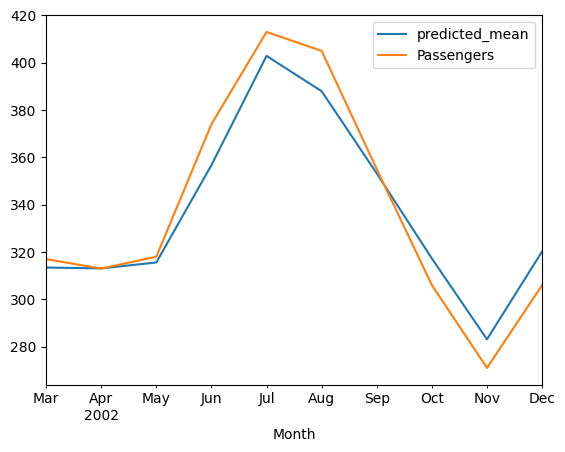

In [20]:
pred.plot(legend=True)
test['Passengers'].plot(legend=True)

### RMSE error

In [21]:
test['Passengers'].mean()

337.8

In [22]:
from math import sqrt
test['Passengers'].mean()
rmse = sqrt(mean_squared_error(pred,test['Passengers']))
print(f"rmse: {rmse}")

rmse: 10.906260291921996
